In [1]:

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
likes = pd.read_csv('/content/drive/My Drive/likes.csv')
likes.head()

,likeid,name
0,3c1636c878e6eb2acfd00c6b61086e38,REIGN by Paul Gibson
1,feca46ddb8ef04f86172ace0cb7e004c,Cupcake Wishes & Birthday Dreams
2,b65f46d64c688fe98bdbcf93a76a71fc,Yo también me rei de la caída de otro jejeje
3,9c5c8bb82d2cd46fbd7582f944fe370e,Abraham Joshua Heschel Day School- Alumni Network
4,2d82fa84ad79b085dc516dde154327a2,Kennesaw Farmer's Market


In [0]:
users = pd.read_csv('/content/drive/My Drive/users.csv')
users.head()

,userid,gender,age,political,ope,con,ext,agr,neu
0,54f34605aebd63f7680e37ffd299af79,0,33,0.0,1.26,1.65,1.17,-1.76,0.61
1,86399f8c44ba54224b2e60177ca89fa9,1,35,0.0,1.07,0.17,-0.14,1.49,0.30
2,84fab50f3c60d1fdc83aa91b5e584a78,1,36,0.0,0.89,1.28,0.86,1.07,0.99
3,f3b8fdaccce12ef6352bfad4d6052fe9,0,39,NaN,0.33,-1.01,-0.33,-0.68,0.92
4,8b06ea5e9cb87c61da387995450607f7,0,31,NaN,0.15,0.47,1.17,-1.01,-0.32


In [0]:
users.isna().sum()

userid           0
gender           0
age              0
political    82920
ope              0
con              0
ext              0
agr              0
neu              0
dtype: int64

In [0]:
users_likes = pd.read_csv('/content/drive/My Drive/users-likes.csv')
users_likes.head()

,userid,likeid
0,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38
1,978ab8e90c4d6ad1a48ef5c973b62f4d,feca46ddb8ef04f86172ace0cb7e004c
2,85123b0e358907725cf19a2cb0ec3983,b65f46d64c688fe98bdbcf93a76a71fc
3,ce110562b3e2f7e5cad3775b32d9caa5,b65f46d64c688fe98bdbcf93a76a71fc
4,8188d20745471273fa69ba44a5b28473,b65f46d64c688fe98bdbcf93a76a71fc


In [0]:
users_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10612326 entries, 0 to 10612325
Data columns (total 2 columns):
userid    object
likeid    object
dtypes: object(2)
memory usage: 161.9+ MB


In [0]:
users_likes.isna().sum()

userid    0
likeid    0
dtype: int64

In [0]:
userslikes_users_index = users_likes.reset_index().merge(users.reset_index(), on=['userid'])
userslikes_users_index = userslikes_users_index.rename(columns = {'index_y':'user_index'})
userslikes_users_index

,index_x,userid,likeid,user_index,gender,age,political,ope,con,ext,agr,neu
0,0,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74
1,40317,71bc7c0901488aec6d30f0add257e7c5,0b587fcf3266aae62fc0b22c43ff275e,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74
2,57390,71bc7c0901488aec6d30f0add257e7c5,afa59bf63dc4650d6cb3b74f3a060fb6,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74
3,287816,71bc7c0901488aec6d30f0add257e7c5,90a867d19b9c5dc70463a6d052607ac9,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74
4,369314,71bc7c0901488aec6d30f0add257e7c5,a3f27088743730f735233420a4e8c809,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...
10612321,10608560,2ec2c5e0bd515db7f272f85ac164fe29,576e5cdcee265f221c7ca38ff4b338e6,42201,1,25,NaN,-0.50,-1.16,1.48,-1.51,1.36
10612322,10608748,bc5b792973fbc7c664c1135300f745f4,576e5cdcee265f221c7ca38ff4b338e6,50347,1,30,NaN,0.70,0.17,0.86,0.66,-0.51
10612323,10610104,1c915367d3b4eade5fb5b3c920108baf,576e5cdcee265f221c7ca38ff4b338e6,98585,1,24,NaN,-0.50,0.10,0.17,-0.26,-0.10
10612324,10610885,967408598b12000e6cdf629c7abed35c,54cf335330ef784f8479915a46c18d33,27427,0,23,1.0,-0.22,0.84,1.23,-0.34,-1.38


In [0]:
userslikes_likes_index = users_likes.reset_index().merge(likes.reset_index(), on =['likeid'])
userslikes_likes_index = userslikes_likes_index.rename(columns = {'index_y':'like_index'})
userslikes_likes_index


,index_x,userid,likeid,like_index,name
0,0,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38,0,REIGN by Paul Gibson
1,1,978ab8e90c4d6ad1a48ef5c973b62f4d,feca46ddb8ef04f86172ace0cb7e004c,1,Cupcake Wishes & Birthday Dreams
2,2,85123b0e358907725cf19a2cb0ec3983,b65f46d64c688fe98bdbcf93a76a71fc,2,Yo también me rei de la caída de otro jejeje
3,3,ce110562b3e2f7e5cad3775b32d9caa5,b65f46d64c688fe98bdbcf93a76a71fc,2,Yo también me rei de la caída de otro jejeje
4,4,8188d20745471273fa69ba44a5b28473,b65f46d64c688fe98bdbcf93a76a71fc,2,Yo también me rei de la caída de otro jejeje
...,...,...,...,...,...
10612321,10612321,264088faf4884d77e025a4ceda148b73,20458d0f521d4bd3a0903cf2113a43f3,1580283,Mucca Pazza
10612322,10612322,d498e43d700dbb0006b733aa912e49c7,20458d0f521d4bd3a0903cf2113a43f3,1580283,Mucca Pazza
10612323,10612323,76ac7130db7f6065c969402226b7053b,20458d0f521d4bd3a0903cf2113a43f3,1580283,Mucca Pazza
10612324,10612324,05dcd62425918392dc5d42f7550cbd9e,20458d0f521d4bd3a0903cf2113a43f3,1580283,Mucca Pazza


In [0]:
userslikes_users_index = userslikes_users_index.drop(['index_x'], axis=1)
userslikes_likes_index = userslikes_likes_index.drop(['index_x'], axis=1)

In [0]:
userslikes_merged = userslikes_users_index.reset_index().merge(userslikes_likes_index.reset_index(), on=['userid','likeid'])
userslikes_merged

,index_x,userid,likeid,user_index,gender,age,political,ope,con,ext,agr,neu,index_y,like_index,name
0,0,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74,0,0,REIGN by Paul Gibson
1,1,71bc7c0901488aec6d30f0add257e7c5,0b587fcf3266aae62fc0b22c43ff275e,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74,40317,5777,1 Million People Saying Shame on Arizona
2,2,71bc7c0901488aec6d30f0add257e7c5,afa59bf63dc4650d6cb3b74f3a060fb6,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74,57390,8316,Kathy Griffin
3,3,71bc7c0901488aec6d30f0add257e7c5,90a867d19b9c5dc70463a6d052607ac9,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74,287816,41110,Sufjan Stevens
4,4,71bc7c0901488aec6d30f0add257e7c5,a3f27088743730f735233420a4e8c809,59352,1,37,NaN,0.61,1.36,-0.21,1.57,0.74,369314,50908,Van Morrison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612321,10612321,2ec2c5e0bd515db7f272f85ac164fe29,576e5cdcee265f221c7ca38ff4b338e6,42201,1,25,NaN,-0.50,-1.16,1.48,-1.51,1.36,10608560,1580090,Supernatural
10612322,10612322,bc5b792973fbc7c664c1135300f745f4,576e5cdcee265f221c7ca38ff4b338e6,50347,1,30,NaN,0.70,0.17,0.86,0.66,-0.51,10608748,1580090,Supernatural
10612323,10612323,1c915367d3b4eade5fb5b3c920108baf,576e5cdcee265f221c7ca38ff4b338e6,98585,1,24,NaN,-0.50,0.10,0.17,-0.26,-0.10,10610104,1580090,Supernatural
10612324,10612324,967408598b12000e6cdf629c7abed35c,54cf335330ef784f8479915a46c18d33,27427,0,23,1.0,-0.22,0.84,1.23,-0.34,-1.38,10610885,1580140,Old Cartoons


In [0]:
userslikes_merged_new = userslikes_merged.drop(['index_x','userid','likeid','gender','age','political','ope','con','ext','agr','neu','index_y','name'], axis=1)
userslikes_merged_new

,user_index,like_index
0,59352,0
1,59352,5777
2,59352,8316
3,59352,41110
4,59352,50908
...,...,...
10612321,42201,1580090
10612322,50347,1580090
10612323,98585,1580090
10612324,27427,1580140


In [0]:
from scipy.sparse import dok_matrix
M = dok_matrix((len(users.index), len(likes.index)))


In [0]:
for index, row in userslikes_merged_new.iterrows():
  i = row['user_index']
  j = row['like_index']
  M[i,j] = 1
  if index % 1000000 == 0:
    print(index, 'of 10612326')

0 of 10612326
1000000 of 10612326
2000000 of 10612326
3000000 of 10612326
4000000 of 10612326
5000000 of 10612326
6000000 of 10612326
7000000 of 10612326
8000000 of 10612326
9000000 of 10612326
10000000 of 10612326


In [0]:
import scipy.sparse
M = M.tobsr()
scipy.sparse.save_npz('/content/drive/My Drive/sparse_matrix.npz', M)

In [0]:
M = scipy.sparse.load_npz('/content/drive/My Drive/sparse_matrix.npz')

Singular Value Decomposition (SVD)

In [0]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, eigs
import seaborn as sns
import matplotlib as plt
import numpy as np

In [0]:
M = M.tocsc()


In [0]:
u15, s15, v15 = svds(M, k=15)
print('u =',u.shape)
print('s =',s.shape)
print('v =',v.shape)

u = (110728, 5)
s = (5,)
v = (5, 1580284)


Text(0, 0.5, 'Percent Variance')

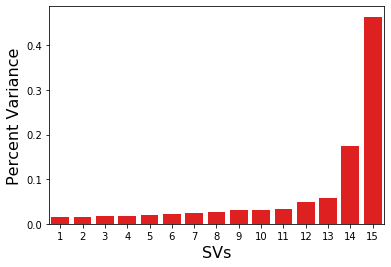

In [0]:
variance = np.round(s15**2/np.sum(s15**2), decimals=3)
variance
 
sns.barplot(x=list(range(1,len(variance)+1)),
            y=variance, color="red")
plt.pyplot.xlabel('SVs', fontsize=16)
plt.pyplot.ylabel('Percent Variance', fontsize=16)


In [0]:
u10, s10, v10 = svds(M, k=10)
print('u =',u.shape)
print('s =',s.shape)
print('v =',v.shape)

u = (110728, 5)
s = (5,)
v = (5, 1580284)


Text(0, 0.5, 'Percent Variance Explained')

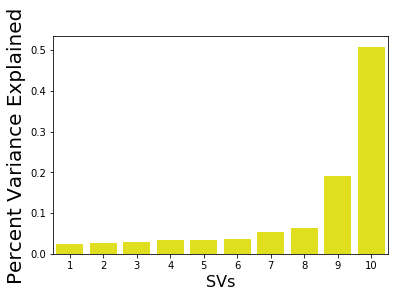

In [0]:
var_explained = np.round(s10**2/np.sum(s10**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="yellow")
plt.pyplot.xlabel('SVs', fontsize=16)
plt.pyplot.ylabel('Percent Variance Explained', fontsize=20)


In [0]:
u5, s5, v5 = svds(M, k=5)
print('u =',u.shape)
print('s =',s.shape)
print('v =',v.shape)

u = (110728, 5)
s = (5,)
v = (5, 1580284)


Text(0, 0.5, 'Percent Variance Explained')

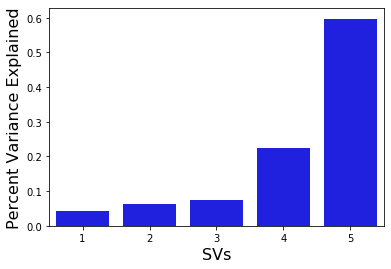

In [0]:
var_explained = np.round(s5**2/np.sum(s5**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="blue")
plt.pyplot.xlabel('SVs', fontsize=16)
plt.pyplot.ylabel('Percent Variance Explained', fontsize=16)


In [0]:
u5

array([[ 5.68278771e-05,  3.28155372e-04, -2.51713826e-04,
        -1.26558164e-04, -4.25861730e-05],
       [-2.61709188e-04, -6.38551417e-05, -5.01306064e-04,
        -1.59480237e-04, -4.76597319e-05],
       [-4.60199688e-04,  1.05033093e-03, -2.83165539e-03,
        -8.52222681e-04, -2.48478367e-04],
       ...,
       [ 1.04476327e-04,  4.27481090e-04,  4.38056539e-05,
        -1.42982475e-04, -4.15996219e-05],
       [ 5.18737256e-04, -2.00831267e-03, -3.31102273e-03,
        -2.03004570e-03, -8.03916553e-04],
       [ 3.18476204e-04, -4.33602232e-04, -9.57142621e-04,
        -4.68272894e-04, -1.69599423e-04]])

In [0]:
s5

array([173.74392491, 210.66268937, 231.54010084, 400.50286362,
       654.13573063])

In [0]:
v5

array([[ 1.08196012e-05,  2.86140965e-05, -1.30554449e-04, ...,
         8.03171577e-06, -3.28817592e-05,  8.89121815e-05],
       [ 1.88410749e-05,  1.58370897e-04, -1.87679839e-04, ...,
         3.19479287e-05, -1.23003804e-04,  1.85734061e-04],
       [-5.94199316e-06,  3.20972155e-05,  1.87056579e-04, ...,
        -2.62406651e-05,  1.11777960e-04, -1.10695678e-04],
       [-3.31324845e-06, -2.84993312e-05, -9.88125228e-05, ...,
        -9.07898367e-06, -4.54560846e-05, -7.49148561e-05],
       [-7.58313008e-07, -8.29687592e-06, -7.62208799e-05, ...,
        -7.90739137e-06, -3.39289844e-05, -1.94456427e-05]])

In [0]:
pip install factor-analyzer

     |████████████████████████████████| 40kB 1.7MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40382 sha256=d805d4866f02fe6c90d922014904435e25534ea44bf176a21c1af2398b7e3595
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [0]:
from factor_analyzer import FactorAnalyzer, Rotator

In [0]:
#fa = FactorAnalyzer(rotation=None)
#fa.fit(v)
#rotator = Rotator(method='varimax')
#v_rot = rotator.fit_transform(fa.loadings_)

In [0]:
#u_rot = numpy.dot(M,v_rot)

Latent Dirichment Allocation (LDA)

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

In [0]:
LDA = LatentDirichletAllocation(n_components=5, random_state=0)
LDA.fit(M)
M_LDA = LDA.transform(M)
M_LDA 

array([[0.02234673, 0.02223642, 0.0227359 , 0.02232356, 0.91035739],
       [0.0222249 , 0.02222792, 0.02229608, 0.02224201, 0.9110091 ],
       [0.00327907, 0.00327983, 0.00329747, 0.00328252, 0.9868611 ],
       ...,
       [0.01820251, 0.01818594, 0.72386459, 0.01827985, 0.22146711],
       [0.00394203, 0.00393018, 0.00403205, 0.00399062, 0.98410512],
       [0.0117865 , 0.01178122, 0.29427112, 0.01193474, 0.67022642]])

Correlation Analysis LDA Clusters

In [0]:
user_wo_id = users.drop(['userid'], axis=1)

In [0]:
import scipy.stats

cols = []
for i in range(1,len(M_LDA[0])+1):
  cols.append(str(i))

M_LDA_df = pd.DataFrame(np.array(M_LDA), columns=cols)
LDA_all_features = pd.concat([M_LDA_df, user_wo_id], axis=1)


In [0]:
LDA_all_features

,1,2,3,4,5,gender,age,political,ope,con,ext,agr,neu
0,0.022347,0.022236,0.022736,0.022324,0.910357,0,33,0.0,1.26,1.65,1.17,-1.76,0.61
1,0.022225,0.022228,0.022296,0.022242,0.911009,1,35,0.0,1.07,0.17,-0.14,1.49,0.30
2,0.003279,0.003280,0.003297,0.003283,0.986861,1,36,0.0,0.89,1.28,0.86,1.07,0.99
3,0.040001,0.040071,0.040025,0.040089,0.839813,0,39,NaN,0.33,-1.01,-0.33,-0.68,0.92
4,0.040004,0.040024,0.040147,0.040108,0.839717,0,31,NaN,0.15,0.47,1.17,-1.01,-0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110723,0.007701,0.007717,0.007783,0.007812,0.968987,1,26,NaN,1.04,0.69,0.54,-1.51,0.56
110724,0.007694,0.007733,0.007784,0.007932,0.968857,1,22,NaN,-0.54,-1.38,-0.58,-2.17,0.36
110725,0.018203,0.018186,0.723865,0.018280,0.221467,0,33,NaN,-0.72,0.84,1.48,-0.84,0.11
110726,0.003942,0.003930,0.004032,0.003991,0.984105,1,22,NaN,1.16,0.32,-0.71,0.41,0.50


In [0]:
corr_LDA= LDA_all_features.corr(method='pearson')

In [0]:
corr_LDA = corr_LDA.drop(['gender','age','political','ope','con','ext','agr','neu'], axis=1)

In [0]:
corr_LDA =  corr_LDA.drop(cols, axis=0)
corr_LDA

,1,2,3,4,5
gender,-0.008528,0.041261,-0.066784,0.031667,0.006269
age,0.046234,-0.123759,0.061014,-0.067734,0.044024
political,0.011913,0.003494,-0.044363,0.032235,0.006320
ope,-0.016768,-0.020529,0.090094,-0.043508,-0.015826
con,0.001183,-0.050839,-0.020953,-0.000066,0.033621
ext,0.013527,0.014996,-0.009025,0.023192,-0.017892
agr,-0.002849,-0.018844,-0.008942,0.009149,0.008503
neu,-0.015854,0.026891,-0.020140,-0.002608,0.006305


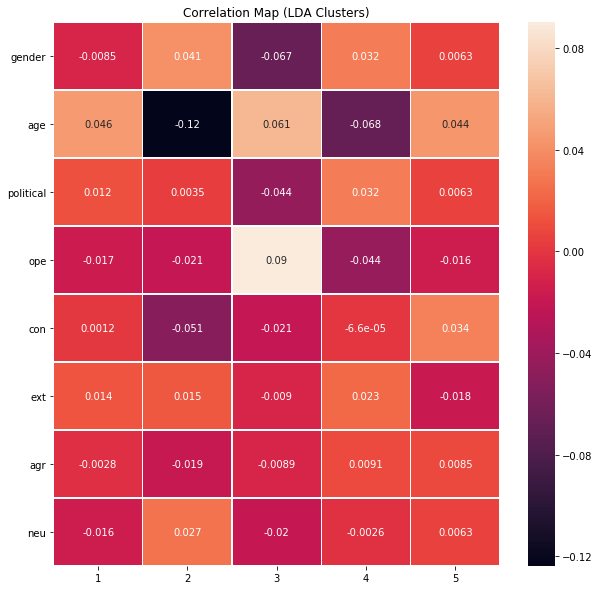

In [0]:
f,ax=plt.pyplot.subplots(figsize = (10,10))
sns.heatmap(corr_LDA,annot= True,linewidths=0.5,ax=ax)
plt.pyplot.xticks(rotation=0)
plt.pyplot.yticks(rotation=0)
plt.pyplot.title('Correlation Map (LDA Clusters)')
plt.pyplot.show()

In [0]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #", topic_idx+1,':')
        print("\n".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print('\n')
    print()

In [0]:
like_descriptions = likes.name.values
print_top_words(LDA, like_descriptions, 15)

Topic # 1 :
Sephora France
DYNAMO FORMATION INTERNATIONAL
GOD WELL
Emperor
Immortal
Morbid Angel
Carcass
NPR
Cryptopsy
Gorgoroth
Chase Community Giving
Dark Funeral
Wintersun
Enslaved
Sodom


Topic # 2 :
Telling inanimate objects to STAY when they look like they're going to fall
My level of maturity changes depending on who im with.
Ok, If we get caught here's the story...
I feel stupid when I say what? a thousand times because I can't hear
I hate when my parents rush me to get ready and then when I am, they're not
i finally stop laughing... look back over at you and start all over again
Don't EVER break a pinky promise. That stuff is LEGIT.
greatest game ever: DON'T LET THE BALLOON TOUCH THE FLOOR
Ohh thats a tan?.. I thought you got attacked by a mob of orange markers..
If you remember the L'Orealkids FISH SHAPED SHAMPOO BOTTLE!
I hate it when i'm taking a drink and all the ice attacks my face
Open fridge, nothing. Freezer? nothing. Might as well try the fridge again.
Comebacks that 

Correlation Analysis of SVD Dimensions (k=5)

In [0]:
user_wo_id = users.drop(['userid'], axis=1)

In [0]:
import scipy.stats

cols = []
for i in range(1,len(u5[0])+1):
  cols.append(str(i))

M_SVD_df = pd.DataFrame(np.array(u5), columns=cols)
SVD_all_features = pd.concat([M_SVD_df, user_wo_id], axis=1)

In [0]:
SVD_all_features

,1,2,3,4,5,gender,age,political,ope,con,ext,agr,neu
0,0.000057,0.000328,-0.000252,-0.000127,-0.000043,0,33,0.0,1.26,1.65,1.17,-1.76,0.61
1,-0.000262,-0.000064,-0.000501,-0.000159,-0.000048,1,35,0.0,1.07,0.17,-0.14,1.49,0.30
2,-0.000460,0.001050,-0.002832,-0.000852,-0.000248,1,36,0.0,0.89,1.28,0.86,1.07,0.99
3,-0.000022,-0.000025,-0.000044,-0.000013,-0.000005,0,39,NaN,0.33,-1.01,-0.33,-0.68,0.92
4,0.000232,-0.000513,-0.000787,-0.000359,-0.000137,0,31,NaN,0.15,0.47,1.17,-1.01,-0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110723,0.000788,-0.001120,-0.002146,-0.001131,-0.000458,1,26,NaN,1.04,0.69,0.54,-1.51,0.56
110724,-0.000574,-0.001407,-0.000764,-0.000699,-0.000382,1,22,NaN,-0.54,-1.38,-0.58,-2.17,0.36
110725,0.000104,0.000427,0.000044,-0.000143,-0.000042,0,33,NaN,-0.72,0.84,1.48,-0.84,0.11
110726,0.000519,-0.002008,-0.003311,-0.002030,-0.000804,1,22,NaN,1.16,0.32,-0.71,0.41,0.50


In [0]:
corr_SVD= SVD_all_features.corr(method='pearson')

In [0]:
corr_SVD= corr_SVD.drop(['gender','age','political','ope','con','ext','agr','neu'], axis=1)

In [0]:
corr_SVD =  corr_SVD.drop(cols, axis=0)
corr_SVD

,1,2,3,4,5
gender,-0.069595,-0.076107,0.062420,0.041963,-0.048975
age,0.039395,0.090516,0.019788,0.012359,0.137307
political,-0.065637,-0.071394,0.077354,0.059547,0.021459
ope,0.019188,0.100350,-0.109283,-0.070920,-0.025688
con,-0.009295,-0.025243,0.039791,0.007216,0.061387
ext,0.017545,-0.015223,0.063140,0.001169,-0.012901
agr,-0.037485,-0.008148,0.033426,-0.002328,0.018106
neu,-0.013566,-0.020761,-0.035746,-0.001023,-0.050636


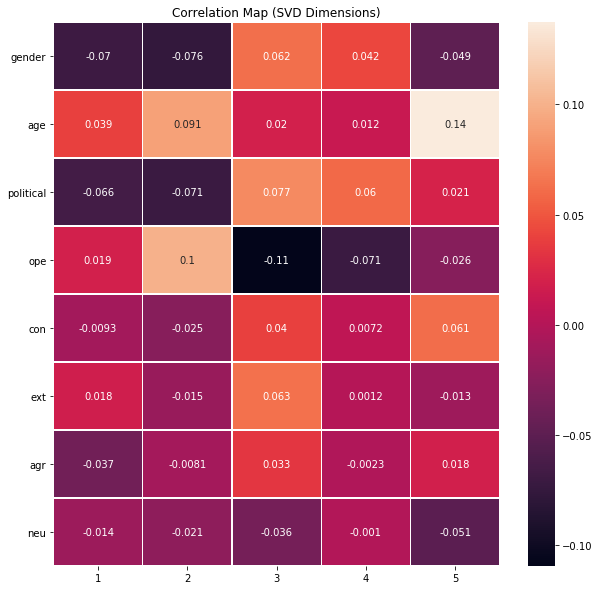

In [0]:
f,ax=plt.pyplot.subplots(figsize = (10,10))
sns.heatmap(corr_SVD,annot= True,linewidths=0.5,ax=ax)
plt.pyplot.xticks(rotation=0)
plt.pyplot.yticks(rotation=0)
plt.pyplot.title('Correlation Map (SVD Dimensions)')
#plt.pyplot.savefig('/content/drive/My Drive/Colab Notebooks/IPADS/project9/plots/corr_svd5.png',dpi=100)
plt.pyplot.show()


Top 10 Topics of SVD Dimensions

In [0]:
v5

array([[ 1.08196012e-05,  2.86140965e-05, -1.30554449e-04, ...,
         8.03171577e-06, -3.28817592e-05,  8.89121815e-05],
       [ 1.88410749e-05,  1.58370897e-04, -1.87679839e-04, ...,
         3.19479287e-05, -1.23003804e-04,  1.85734061e-04],
       [-5.94199316e-06,  3.20972155e-05,  1.87056579e-04, ...,
        -2.62406651e-05,  1.11777960e-04, -1.10695678e-04],
       [-3.31324845e-06, -2.84993312e-05, -9.88125228e-05, ...,
        -9.07898367e-06, -4.54560846e-05, -7.49148561e-05],
       [-7.58313008e-07, -8.29687592e-06, -7.62208799e-05, ...,
        -7.90739137e-06, -3.39289844e-05, -1.94456427e-05]])

In [0]:
def print_top_words_SVD(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(v5):
        print("Topic #", topic_idx+1,':')
        print("\n".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print('\n')
    print()

In [0]:
like_descriptions = likes.name.values
print_top_words_SVD(LDA, like_descriptions, 15)

Topic # 1 :
South Park
Family Guy
Worst. Idea. Ever. [pause] Let's do it.
Truth is, everybody is going to hurt you; you just gotta find the ones worth suffering for. -Bob Marley
Who are you talking to?...... TELL THEM I SAY HI!!!!!!
The Boondocks
Bob Marley
Pink Floyd
Lil Wayne
Tosh.0
mom, i could be dying and you're not answering the phone
The Hangover
Mom I love you... but u be trippin sometimes
Dear sleep, I know we had problems when I was younger, but now I love you
When you're so good at sarcasm no one can tell if you are serious or not


Topic # 2 :
George Takei
The Onion
The Daily Show
The Colbert Report
NPR
I fucking love science
The Beatles
Amazon.com
Queen
Radiohead
Bill Nye The Science Guy - Official Fan Page
Cracked.com
Star Wars
The Walking Dead
The Lord of the Rings Trilogy (Official Page)


Topic # 3 :
YouTube
Oreo
Facebook
Skittles
Starburst
Reese's
Starbucks
Adam Sandler
Subway
DORY
iTunes
Will Smith
Coca-Cola
Finding Nemo
Taco Bell


Topic # 4 :
When a teacher disses 